In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import  SelectKBest,SelectPercentile
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold,cross_validate,RepeatedKFold

In [ ]:
featuers=pd.read_csv('/content/drive/MyDrive/agro/X1.csv')
target=pd.read_csv('/content/drive/MyDrive/agro/y1.csv')



In [ ]:
featuers.head()

ANNUAL   avg_rain  Nitrogen  POTASH  PHOSPHATE  DYSTROPEPTS  FLUVENTS  \
0  1103.9  62.533333     52888   10466      23912          0.0       0.0   
1   886.4  52.891667     63978   12392      30775          0.0       0.0   
2  1068.5  64.175000     60332   11458      27558          0.0       0.0   
3  1149.7  63.200000     77428   19543      45185          0.0       0.0   
4  1282.3  80.216667     72843   17339      45815          0.0       0.0   

   INCEPTISOLS  LOAMY_ALFISOL  ORTHENTS  ...  PSAMMENTS  SANDY_ALFISOL  \
0          0.0            0.6       0.0  ...        0.0            0.0   
1          0.0            0.6       0.0  ...        0.0            0.0   
2          0.0            0.6       0.0  ...        0.0            0.0   
3          0.0            0.6       0.0  ...        0.0            0.0   
4          0.0            0.6       0.0  ...        0.0            0.0   

   UDALFS  UDOLLS_UDALFS  UDUPTS_UDALFS  USTALF_USTOLLS  USTALFS  \
0     0.0            0.0            0.0             0.4      0.0   
1     0.0            0.0            0.0             0.4      0.0   
2     0.0            0.0            0.0             0.4      0.0   
3     0.0            0.0            0.0             0.4      0.0   
4     0.0            0.0            0.0             0.4      0.0   

   VERTIC_SOILS  VERTISOLS  RICE_PRODUCTION  
0           0.0        0.0           984.31  
1           0.0        0.0          1177.10  
2           0.0        0.0          1095.84  
3           0.0        0.0          1319.18  
4           0.0        0.0          1416.48  

[5 rows x 21 columns]

In [ ]:
target.head()

RICE_YIELD
0     1268.46
1     1505.81
2     1369.98
3     1695.77
4     1756.23

In [ ]:
featuers.columns


Index(['ANNUAL', 'avg_rain', 'Nitrogen', 'POTASH', 'PHOSPHATE', 'DYSTROPEPTS',
       'FLUVENTS', 'INCEPTISOLS', 'LOAMY_ALFISOL', 'ORTHENTS', 'ORTHIDS',
       'PSAMMENTS', 'SANDY_ALFISOL', 'UDALFS', 'UDOLLS_UDALFS',
       'UDUPTS_UDALFS', 'USTALF_USTOLLS', 'USTALFS', 'VERTIC_SOILS',
       'VERTISOLS', 'RICE_PRODUCTION'],
      dtype='object')

In [ ]:
featuers.shape,target.shape

((2536, 21), (2536, 1))

In [ ]:
featuers.head(5).transpose()

0             1          2         3             4
ANNUAL            1103.900000    886.400000   1068.500   1149.70   1282.300000
avg_rain            62.533333     52.891667     64.175     63.20     80.216667
Nitrogen         52888.000000  63978.000000  60332.000  77428.00  72843.000000
POTASH           10466.000000  12392.000000  11458.000  19543.00  17339.000000
PHOSPHATE        23912.000000  30775.000000  27558.000  45185.00  45815.000000
DYSTROPEPTS          0.000000      0.000000      0.000      0.00      0.000000
FLUVENTS             0.000000      0.000000      0.000      0.00      0.000000
INCEPTISOLS          0.000000      0.000000      0.000      0.00      0.000000
LOAMY_ALFISOL        0.600000      0.600000      0.600      0.60      0.600000
ORTHENTS             0.000000      0.000000      0.000      0.00      0.000000
ORTHIDS              0.000000      0.000000      0.000      0.00      0.000000
PSAMMENTS            0.000000      0.000000      0.000      0.00      0.000000
SANDY_ALFISOL        0.000000      0.000000      0.000      0.00      0.000000
UDALFS               0.000000      0.000000      0.000      0.00      0.000000
UDOLLS_UDALFS        0.000000      0.000000      0.000      0.00      0.000000
UDUPTS_UDALFS        0.000000      0.000000      0.000      0.00      0.000000
USTALF_USTOLLS       0.400000      0.400000      0.400      0.40      0.400000
USTALFS              0.000000      0.000000      0.000      0.00      0.000000
VERTIC_SOILS         0.000000      0.000000      0.000      0.00      0.000000
VERTISOLS            0.000000      0.000000      0.000      0.00      0.000000
RICE_PRODUCTION    984.310000   1177.100000   1095.840   1319.18   1416.480000

In [ ]:
featuers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANNUAL           2536 non-null   float64
 1   avg_rain         2536 non-null   float64
 2   Nitrogen         2536 non-null   int64  
 3   POTASH           2536 non-null   int64  
 4   PHOSPHATE        2536 non-null   int64  
 5   DYSTROPEPTS      2536 non-null   float64
 6   FLUVENTS         2536 non-null   float64
 7   INCEPTISOLS      2536 non-null   float64
 8   LOAMY_ALFISOL    2536 non-null   float64
 9   ORTHENTS         2536 non-null   float64
 10  ORTHIDS          2536 non-null   float64
 11  PSAMMENTS        2536 non-null   float64
 12  SANDY_ALFISOL    2536 non-null   float64
 13  UDALFS           2536 non-null   float64
 14  UDOLLS_UDALFS    2536 non-null   float64
 15  UDUPTS_UDALFS    2536 non-null   float64
 16  USTALF_USTOLLS   2536 non-null   float64
 17  USTALFS       

In [ ]:
featuers[['ANNUAL','RICE_PRODUCTION']]

ANNUAL  RICE_PRODUCTION
0     1103.9           984.31
1      886.4          1177.10
2     1068.5          1095.84
3     1149.7          1319.18
4     1282.3          1416.48
...      ...              ...
2531  1578.1           485.46
2532  1176.5           517.22
2533  1626.4           579.70
2534  1431.2           586.63
2535  1158.4           264.71

[2536 rows x 2 columns]

In [ ]:
featuers[['ANNUAL','RICE_PRODUCTION','avg_rain']]

ANNUAL  RICE_PRODUCTION    avg_rain
0     1103.9           984.31   62.533333
1      886.4          1177.10   52.891667
2     1068.5          1095.84   64.175000
3     1149.7          1319.18   63.200000
4     1282.3          1416.48   80.216667
...      ...              ...         ...
2531  1578.1           485.46  113.875000
2532  1176.5           517.22   73.741667
2533  1626.4           579.70  111.600000
2534  1431.2           586.63   88.866667
2535  1158.4           264.71   58.691667

[2536 rows x 3 columns]

In [ ]:
featuers['LOAMY_ALFISOL'].value_counts()

0.00    2400
0.50      32
0.60      31
0.35      20
1.00      11
0.25      11
0.55      11
0.30      10
0.80      10
Name: LOAMY_ALFISOL, dtype: int64

In [ ]:
featuers['USTALF_USTOLLS'].value_counts()

0.00    2255
1.00     141
0.50      41
0.40      34
0.60      24
0.65      20
0.70      10
0.75       4
0.20       4
0.15       3
Name: USTALF_USTOLLS, dtype: int64

In [ ]:
featuers['DYSTROPEPTS'].value_counts()

0.0    2536
Name: DYSTROPEPTS, dtype: int64

In [ ]:
featuers['Nitrogen'].value_counts()

457      2
96       2
53553    2
2043     2
20816    2
        ..
25925    1
26905    1
30592    1
30436    1
3367     1
Name: Nitrogen, Length: 2509, dtype: int64

In [ ]:
featuers['ORTHENTS'].value_counts()

0.0    2536
Name: ORTHENTS, dtype: int64

In [ ]:
featuers['SANDY_ALFISOL'].value_counts()

0.00    2150
1.00     169
0.85      44
0.50      33
0.40      33
0.75      22
0.60      20
0.35      11
0.30      11
0.80      11
0.70      11
0.15      11
0.20      10
Name: SANDY_ALFISOL, dtype: int64

In [ ]:
featuers['avg_rain'].value_counts()

0.000000     8
44.166667    4
58.250000    3
52.891667    3
79.833333    3
            ..
55.200000    1
47.183333    1
21.250000    1
38.366667    1
58.691667    1
Name: avg_rain, Length: 2379, dtype: int64

In [ ]:
avg_rain_production=featuers.groupby('avg_rain')['RICE_PRODUCTION'].mean().reset_index()
print(avg_rain_production)

        avg_rain  RICE_PRODUCTION
0      -0.916667        670.09000
1      -0.416667        625.31000
2       0.000000        192.16125
3       0.991667        186.50000
4       0.991667         47.73000
...          ...              ...
2374  281.750000         18.77000
2375  290.733333         25.90000
2376  301.616667        484.37000
2377  363.916667        545.58000
2378  368.241667        560.98000

[2379 rows x 2 columns]


In [ ]:
featuers[['avg_rain','Nitrogen','POTASH','PHOSPHATE','RICE_PRODUCTION']].sort_values('RICE_PRODUCTION')[0:5]

avg_rain  Nitrogen  POTASH  PHOSPHATE  RICE_PRODUCTION
907   44.483333     11054    1551       9430             0.02
908   35.341667     14557     363       7151             0.02
1943  56.291667        96      81         87             0.02
1942  36.150000        88      82         75             0.02
1941  85.916667       104      57         61             0.02

In [ ]:
featuers_group_by=featuers.groupby(['avg_rain','Nitrogen','POTASH','PHOSPHATE'])['RICE_PRODUCTION'].mean().reset_index()
print(featuers_group_by)

        avg_rain  Nitrogen  POTASH  PHOSPHATE  RICE_PRODUCTION
0      -0.916667     17851   10391       6112           670.09
1      -0.416667     21537   11113       6428           625.31
2       0.000000        26      18         19            24.51
3       0.000000        48      12         28            18.55
4       0.000000        51      62         57            25.95
...          ...       ...     ...        ...              ...
2531  281.750000     14769   11261       8192            18.77
2532  290.733333      9407    9372       3756            25.90
2533  301.616667      9944    3633       3462           484.37
2534  363.916667     32570   18652      22050           545.58
2535  368.241667     53759   17936      23817           560.98

[2536 rows x 5 columns]


In [ ]:
featuers[['avg_rain','Nitrogen']]

avg_rain  Nitrogen
0      62.533333     52888
1      52.891667     63978
2      64.175000     60332
3      63.200000     77428
4      80.216667     72843
...          ...       ...
2531  113.875000      2144
2532   73.741667      3763
2533  111.600000      3796
2534   88.866667      2925
2535   58.691667      3367

[2536 rows x 2 columns]

<Axes: xlabel='avg_rain', ylabel='RICE_PRODUCTION'>

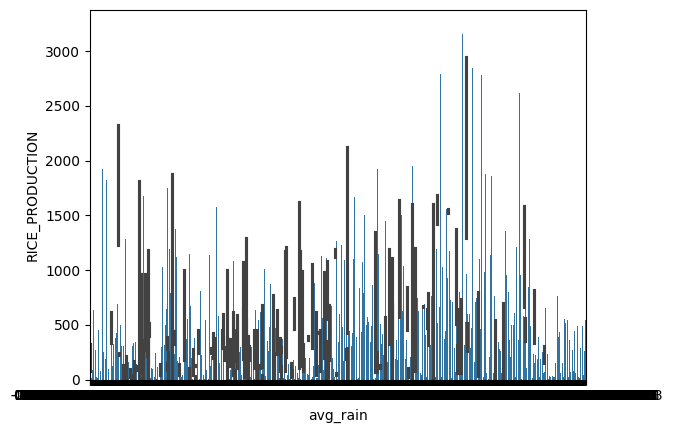

In [ ]:
sns.barplot(x='avg_rain',y='RICE_PRODUCTION',data=featuers)

(array([5.310e+02, 1.007e+03, 5.810e+02, 1.920e+02, 9.900e+01, 8.100e+01,
        3.200e+01, 1.000e+01, 1.000e+00, 2.000e+00]),
 array([ -0.91666667,  35.99916667,  72.915     , 109.83083333,
        146.74666667, 183.6625    , 220.57833333, 257.49416667,
        294.41      , 331.32583333, 368.24166667]),
 <BarContainer object of 10 artists>)

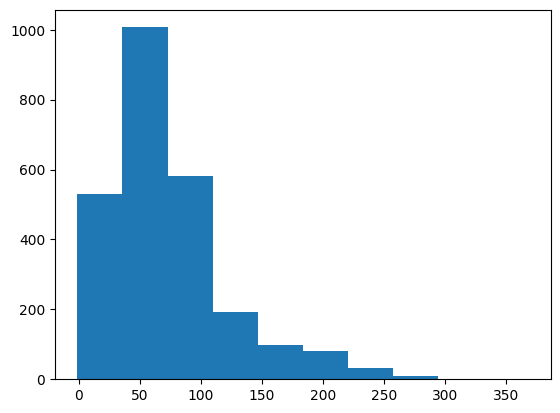

In [ ]:
plt.hist(featuers['avg_rain'])

(array([1381.,  639.,  230.,  148.,   72.,   36.,   14.,    6.,    6.,
           4.]),
 array([2.000000e-02, 3.215190e+02, 6.430180e+02, 9.645170e+02,
        1.286016e+03, 1.607515e+03, 1.929014e+03, 2.250513e+03,
        2.572012e+03, 2.893511e+03, 3.215010e+03]),
 <BarContainer object of 10 artists>)

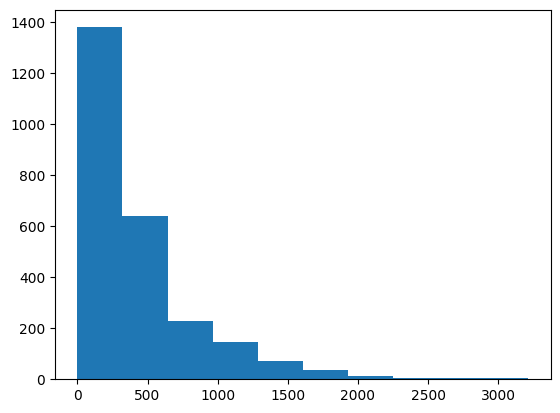

In [ ]:
plt.hist(featuers['RICE_PRODUCTION'])

<ipython-input-25-80e5efd16c0a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(featuers['avg_rain'])


<Axes: xlabel='avg_rain', ylabel='Density'>

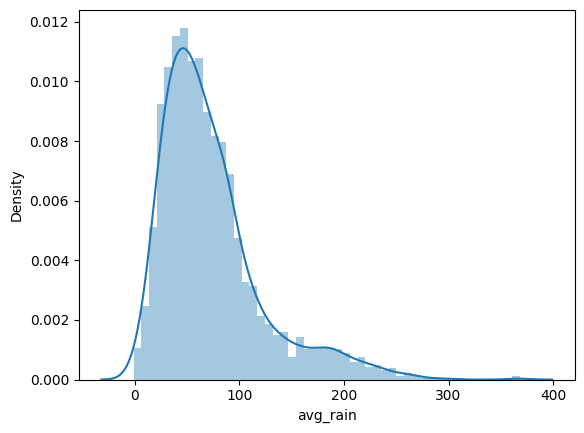

In [ ]:
sns.distplot(featuers['avg_rain'])

<ipython-input-26-35ea6ebf6111>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(featuers['RICE_PRODUCTION'])


<Axes: xlabel='RICE_PRODUCTION', ylabel='Density'>

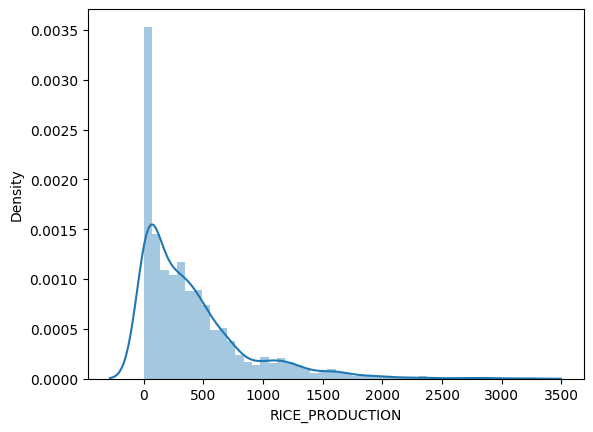

In [ ]:
sns.distplot(featuers['RICE_PRODUCTION'])

<ipython-input-27-9b5a2615e62c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(featuers['avg_rain'],color='y',label='Avg Rain')
<ipython-input-27-9b5a2615e62c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(featuers['RICE_PRODUCTION'],color='r',label='RICE PRODUCTION')


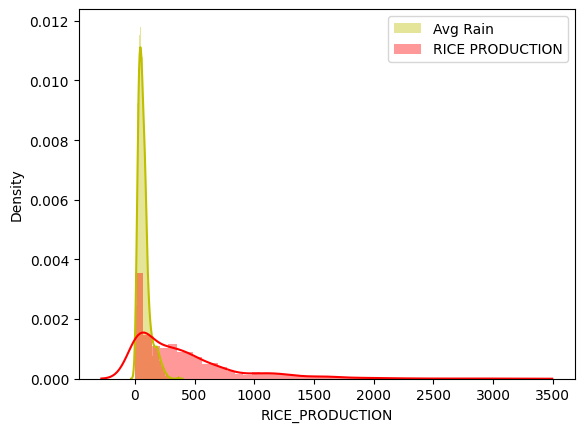

In [ ]:
sns.distplot(featuers['avg_rain'],color='y',label='Avg Rain')
sns.distplot(featuers['RICE_PRODUCTION'],color='r',label='RICE PRODUCTION')
plt.legend()


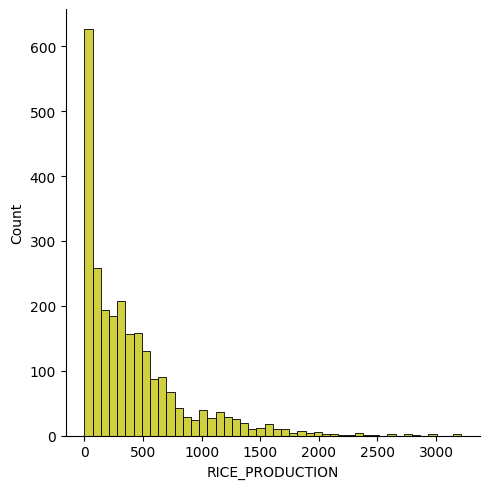

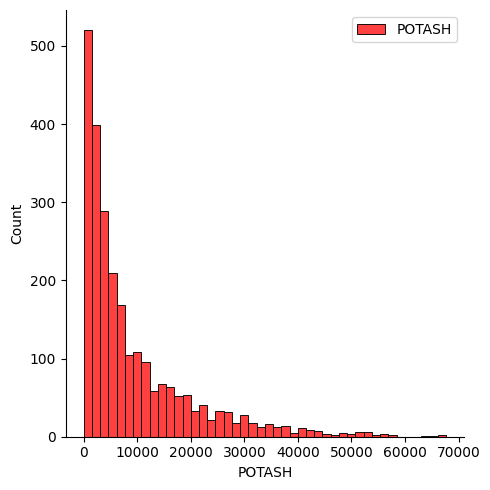

In [ ]:
sns.displot(featuers['RICE_PRODUCTION'],color='y',label='RICE PRODUCTION')
sns.displot(featuers['POTASH'],color='r',label='POTASH')
plt.legend()

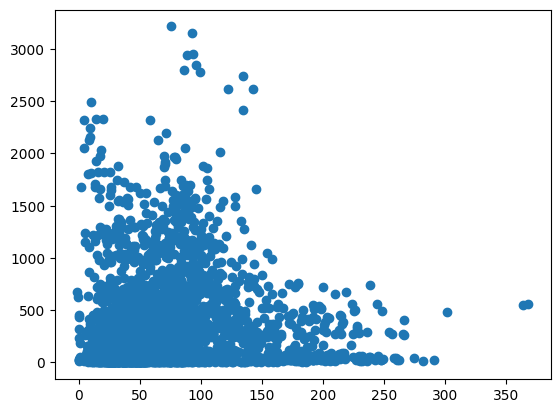

In [ ]:
plt.scatter(x=featuers['avg_rain'],y=featuers['RICE_PRODUCTION'])

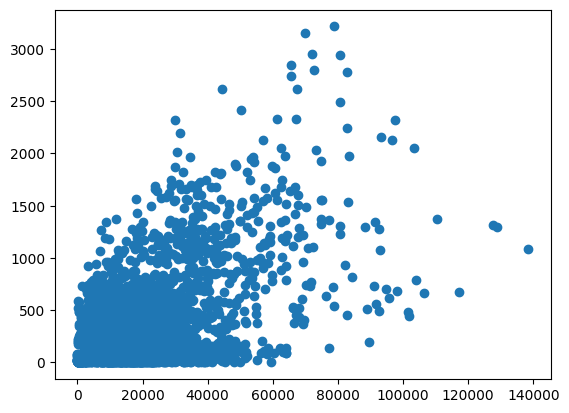

In [ ]:
plt.scatter(x=featuers['PHOSPHATE'],y=featuers['RICE_PRODUCTION'])

<Axes: xlabel='avg_rain', ylabel='RICE_PRODUCTION'>

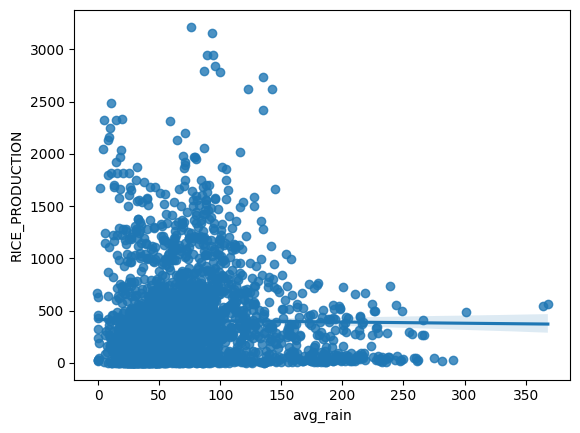

In [ ]:
sns.regplot(x='avg_rain',y='RICE_PRODUCTION',data=featuers)

<Axes: xlabel='PHOSPHATE', ylabel='RICE_PRODUCTION'>

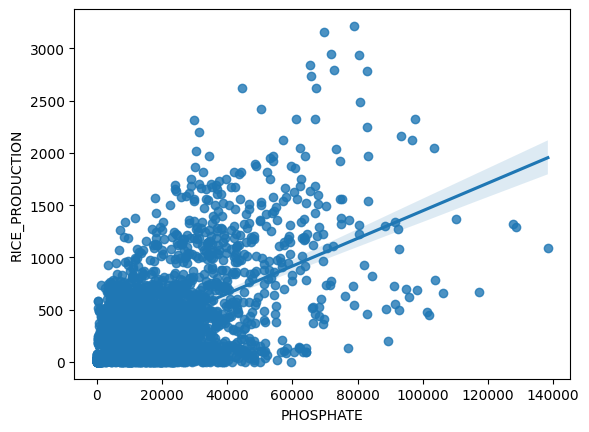

In [ ]:
sns.regplot(x='PHOSPHATE',y='RICE_PRODUCTION',data=featuers)

In [ ]:
def regPlot(x,y):
  return sns.regplot(x=x,y=y,data=featuers)

<Axes: xlabel='VERTISOLS', ylabel='RICE_PRODUCTION'>

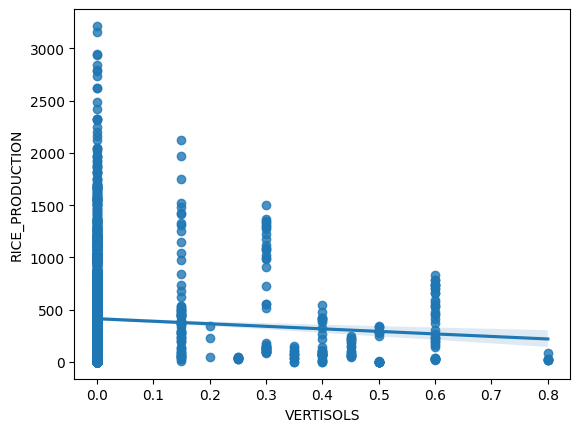

In [ ]:
regPlot('VERTISOLS','RICE_PRODUCTION')

<Axes: xlabel='Nitrogen', ylabel='RICE_PRODUCTION'>

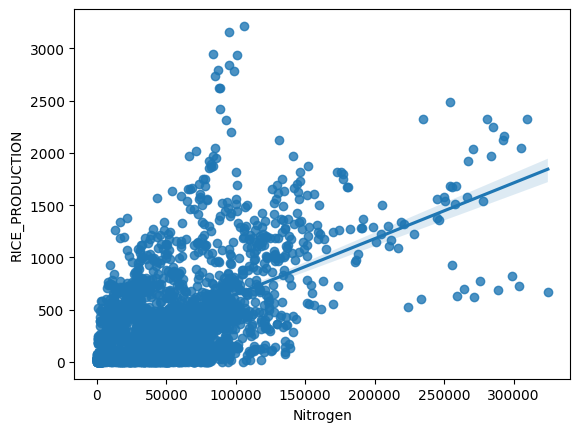

In [ ]:
regPlot('Nitrogen','RICE_PRODUCTION')

<Axes: xlabel='Nitrogen', ylabel='PHOSPHATE'>

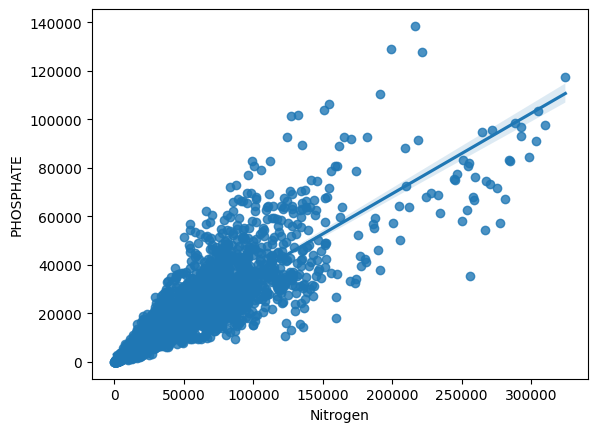

In [ ]:
regPlot('Nitrogen','PHOSPHATE')

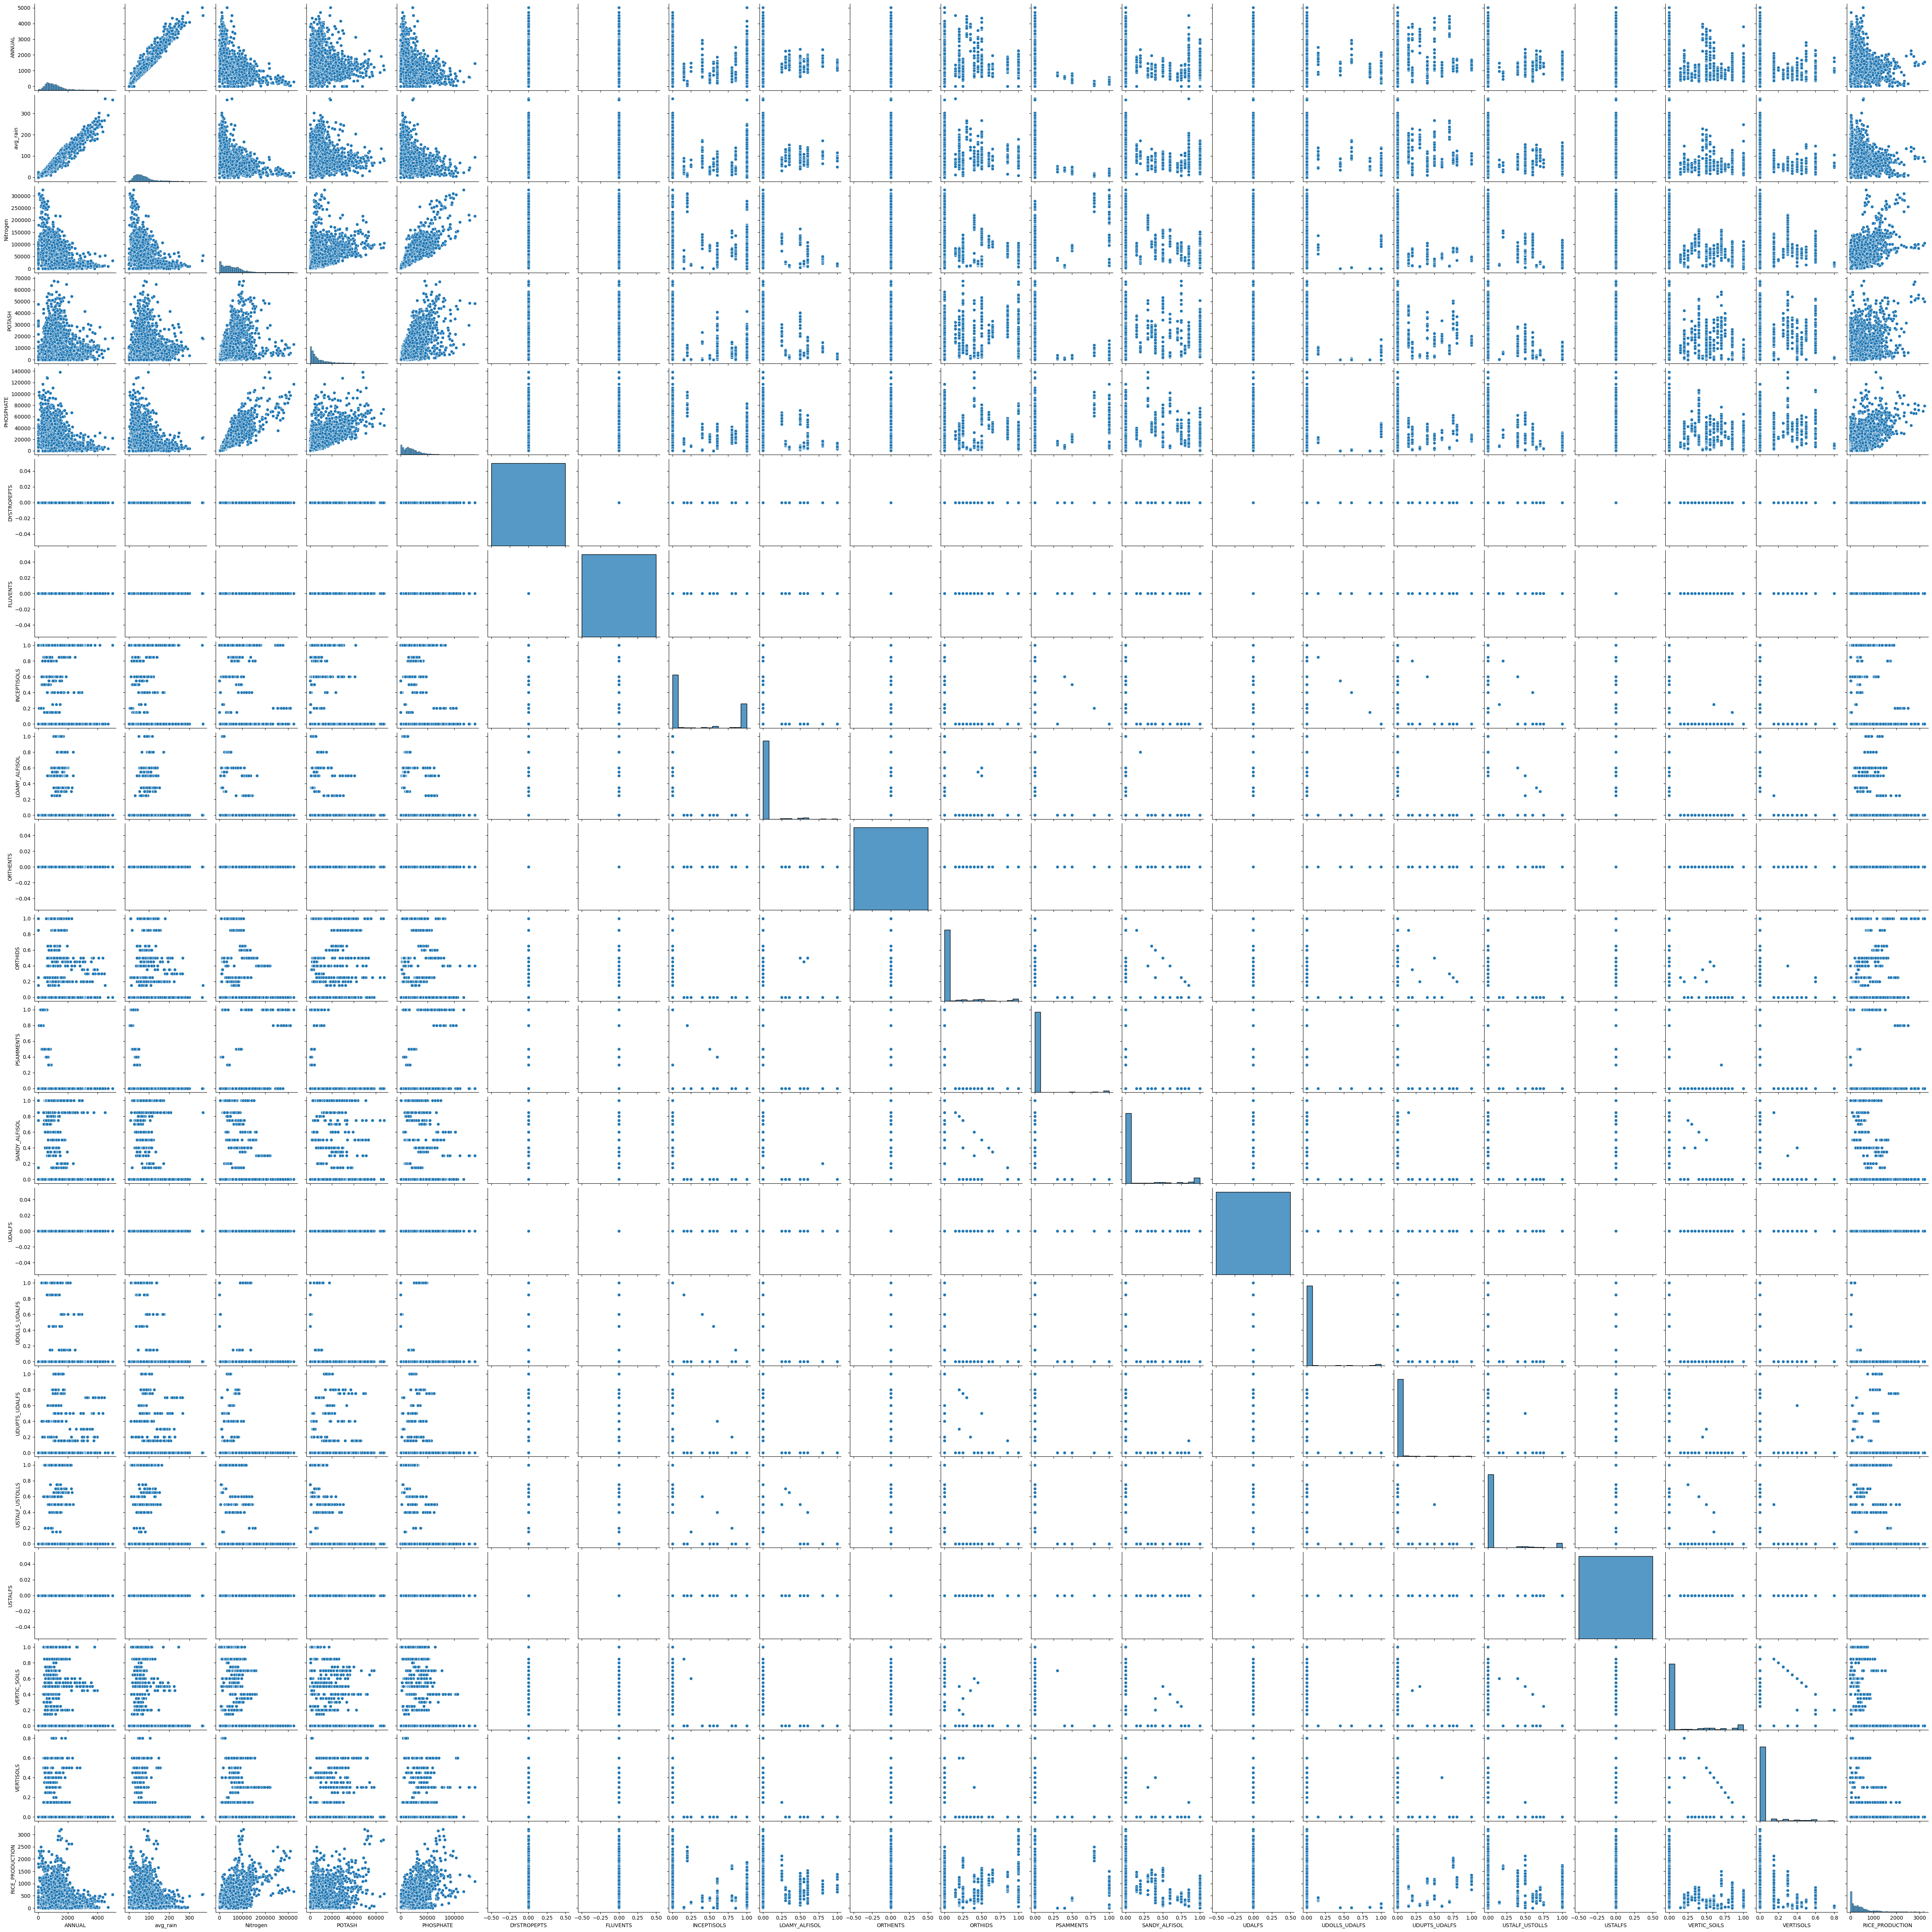

In [ ]:
sns.pairplot(featuers)

In [ ]:
featuers.describe()

ANNUAL     avg_rain       Nitrogen        POTASH      PHOSPHATE  \
count  2536.000000  2536.000000    2536.000000   2536.000000    2536.000000   
mean   1172.977129    73.331993   54799.584779   9174.683360   21202.122240   
std     762.128756    49.231475   46554.753491  10717.759945   18133.923188   
min      -1.000000    -0.916667       0.000000      0.000000       0.000000   
25%     658.300000    39.722917   19944.750000   1920.000000    8396.750000   
50%     994.050000    61.533333   46202.500000   5047.500000   17554.000000   
75%    1443.525000    90.860417   77974.000000  12449.250000   28935.500000   
max    5007.000000   368.241667  324722.000000  67656.000000  138441.000000   

       DYSTROPEPTS  FLUVENTS  INCEPTISOLS  LOAMY_ALFISOL  ORTHENTS  ...  \
count       2536.0    2536.0  2536.000000    2536.000000    2536.0  ...   
mean           0.0       0.0     0.325158       0.028549       0.0  ...   
std            0.0       0.0     0.455172       0.128499       0.0  ...   
min            0.0       0.0     0.000000       0.000000       0.0  ...   
25%            0.0       0.0     0.000000       0.000000       0.0  ...   
50%            0.0       0.0     0.000000       0.000000       0.0  ...   
75%            0.0       0.0     1.000000       0.000000       0.0  ...   
max            0.0       0.0     1.000000       1.000000       0.0  ...   

         PSAMMENTS  SANDY_ALFISOL  UDALFS  UDOLLS_UDALFS  UDUPTS_UDALFS  \
count  2536.000000    2536.000000  2536.0    2536.000000    2536.000000   
mean      0.023541       0.115103     0.0       0.026065       0.028470   
std       0.142622       0.291708     0.0       0.149235       0.128494   
min       0.000000       0.000000     0.0       0.000000       0.000000   
25%       0.000000       0.000000     0.0       0.000000       0.000000   
50%       0.000000       0.000000     0.0       0.000000       0.000000   
75%       0.000000       0.000000     0.0       0.000000       0.000000   
max       1.000000       1.000000     0.0       1.000000       1.000000   

       USTALF_USTOLLS  USTALFS  VERTIC_SOILS    VERTISOLS  RICE_PRODUCTION  
count     2536.000000   2536.0   2536.000000  2536.000000      2536.000000  
mean         0.084286      0.0      0.137362     0.036021       404.737441  
std          0.253684      0.0      0.300366     0.121304       448.960776  
min          0.000000      0.0      0.000000     0.000000         0.020000  
25%          0.000000      0.0      0.000000     0.000000        71.870000  
50%          0.000000      0.0      0.000000     0.000000       283.430000  
75%          0.000000      0.0      0.000000     0.000000       549.330000  
max          1.000000      0.0      1.000000     0.800000      3215.010000  

[8 rows x 21 columns]

array([[<Axes: title={'center': 'ANNUAL'}>,
        <Axes: title={'center': 'avg_rain'}>,
        <Axes: title={'center': 'Nitrogen'}>,
        <Axes: title={'center': 'POTASH'}>,
        <Axes: title={'center': 'PHOSPHATE'}>],
       [<Axes: title={'center': 'DYSTROPEPTS'}>,
        <Axes: title={'center': 'FLUVENTS'}>,
        <Axes: title={'center': 'INCEPTISOLS'}>,
        <Axes: title={'center': 'LOAMY_ALFISOL'}>,
        <Axes: title={'center': 'ORTHENTS'}>],
       [<Axes: title={'center': 'ORTHIDS'}>,
        <Axes: title={'center': 'PSAMMENTS'}>,
        <Axes: title={'center': 'SANDY_ALFISOL'}>,
        <Axes: title={'center': 'UDALFS'}>,
        <Axes: title={'center': 'UDOLLS_UDALFS'}>],
       [<Axes: title={'center': 'UDUPTS_UDALFS'}>,
        <Axes: title={'center': 'USTALF_USTOLLS'}>,
        <Axes: title={'center': 'USTALFS'}>,
        <Axes: title={'center': 'VERTIC_SOILS'}>,
        <Axes: title={'center': 'VERTISOLS'}>],
       [<Axes: title={'center': 'RICE_PRODUCT

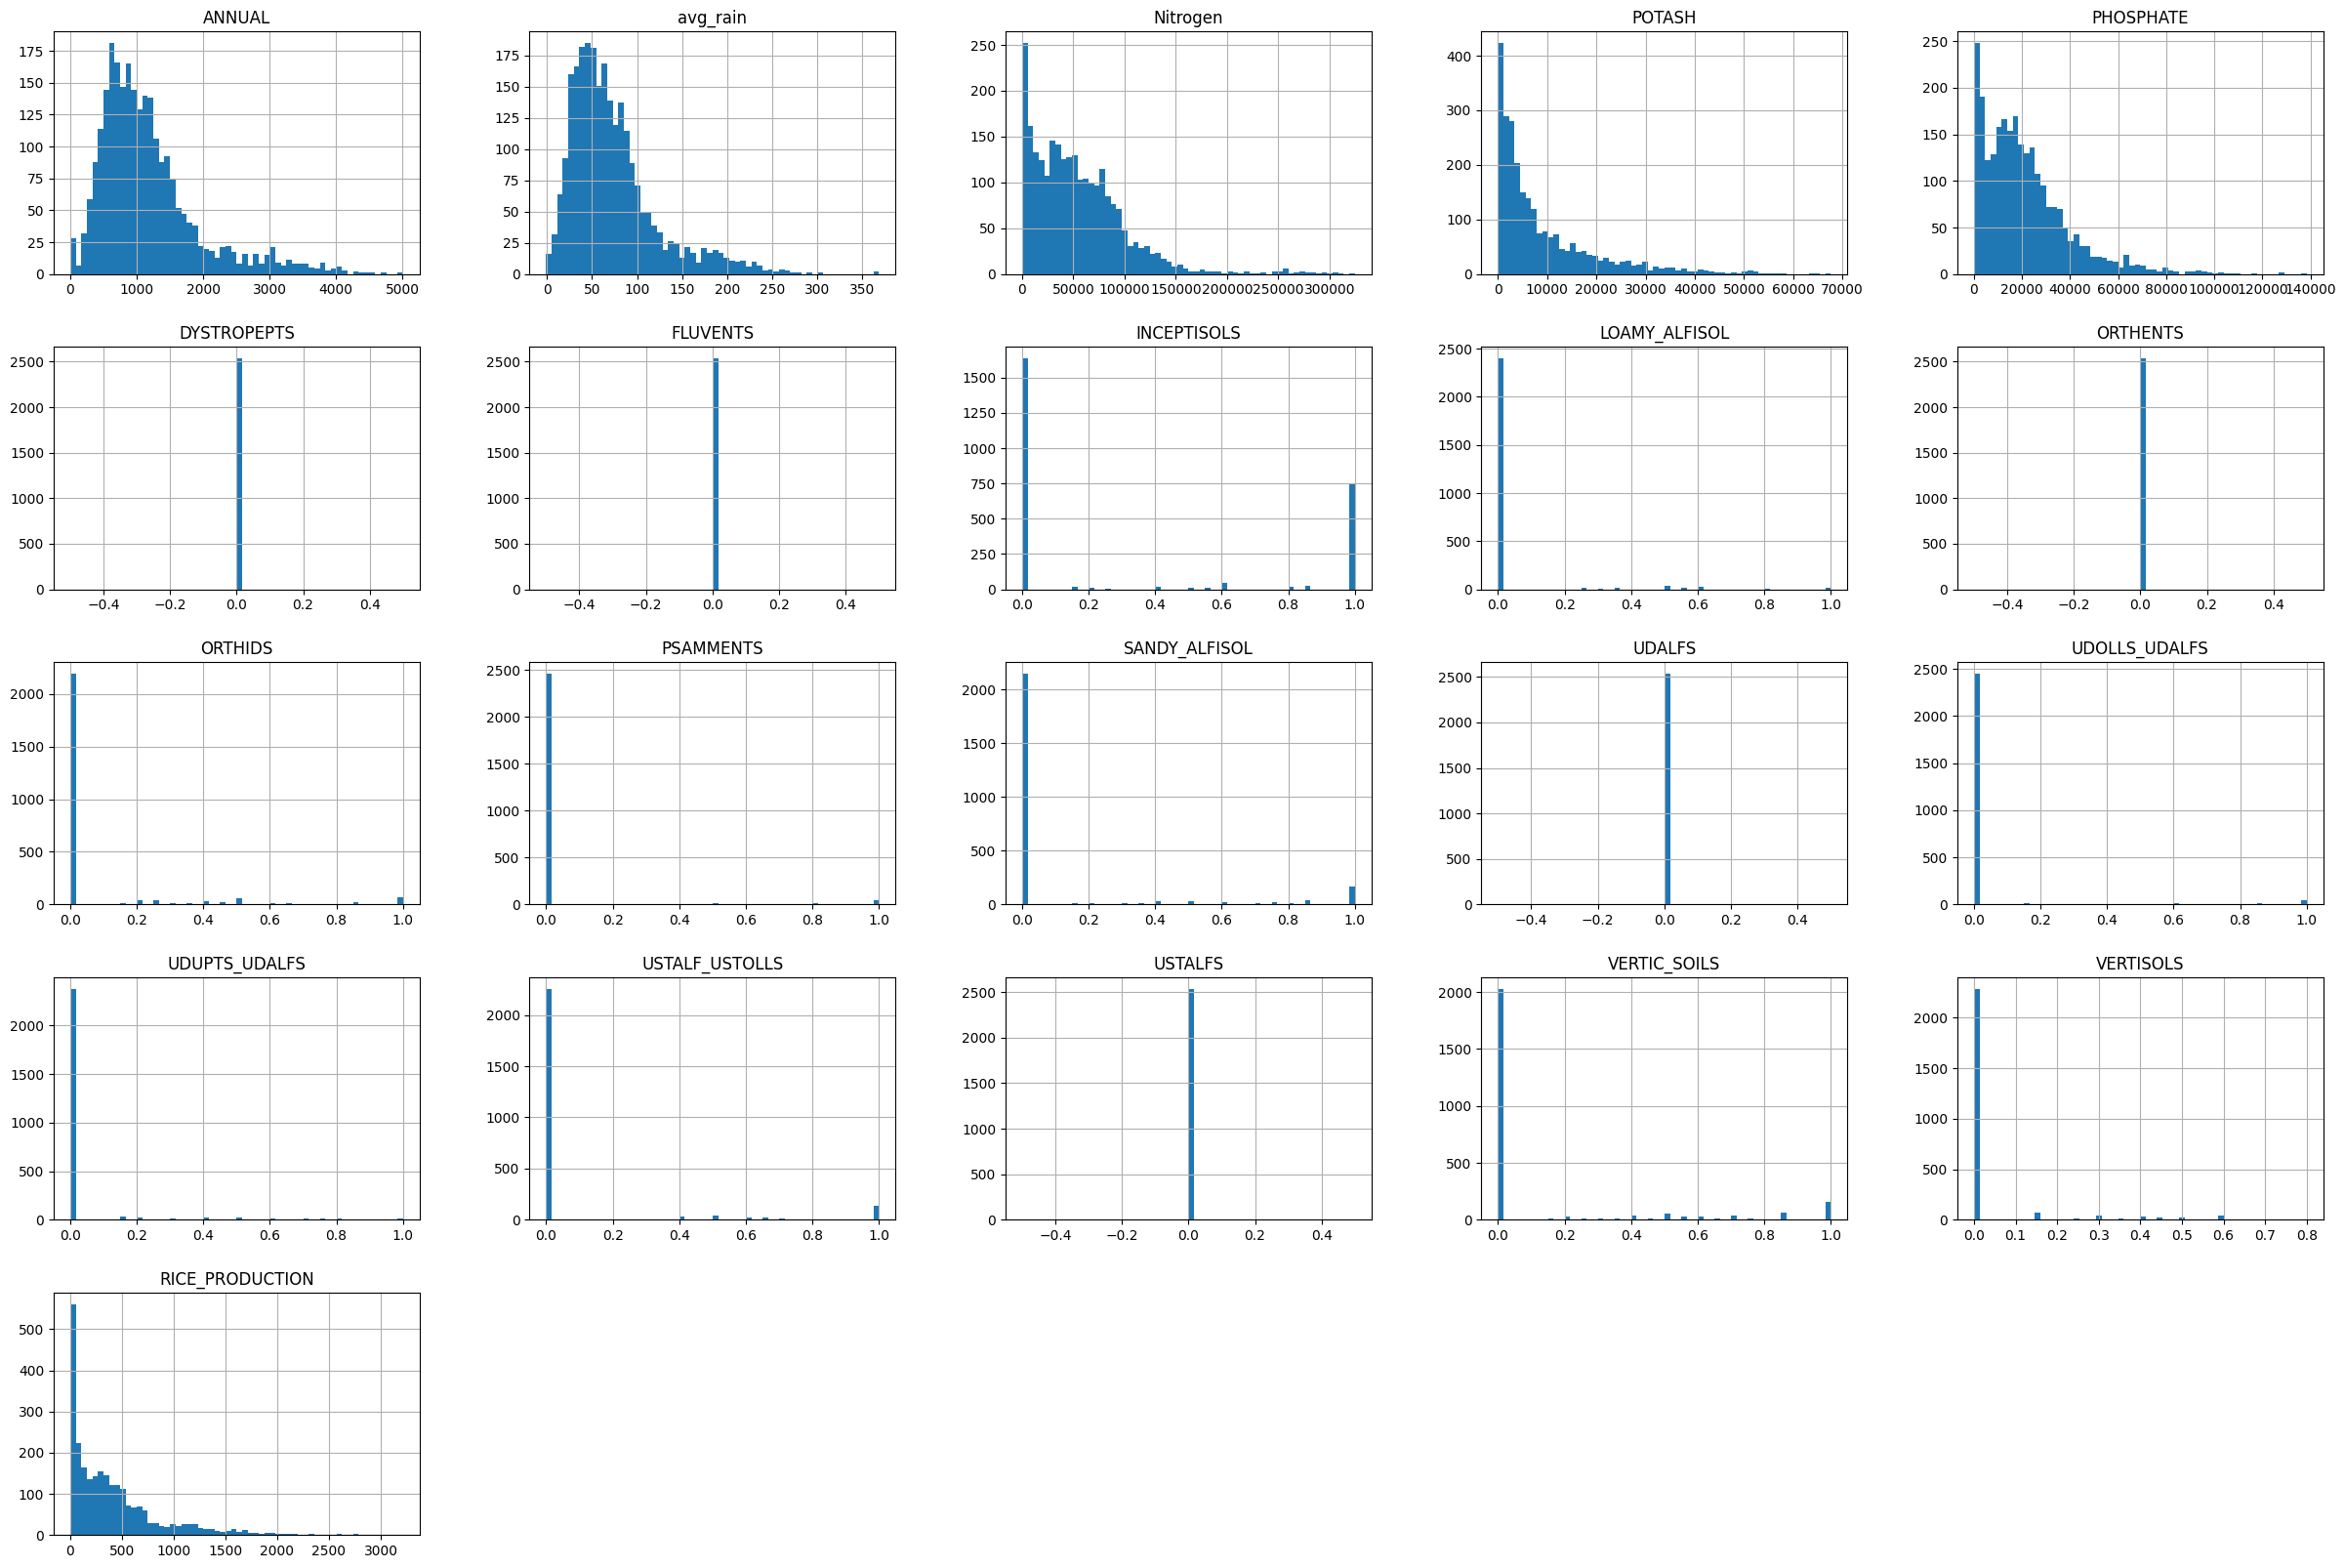

In [ ]:
featuers.hist(bins=60,figsize=(30,20))

**Feature Engineering**

    > Missing Data Imputation







In [ ]:
#Split data into training and test set
X_train,X_test,y_train,y_test=train_test_split(featuers,target,test_size=0.3,random_state=3)

In [ ]:
X_train.shape,X_test.shape

((1775, 21), (761, 21))

**Missing Data Imputation**

In [ ]:
featuers.isnull().sum()

ANNUAL             0
avg_rain           0
Nitrogen           0
POTASH             0
PHOSPHATE          0
DYSTROPEPTS        0
FLUVENTS           0
INCEPTISOLS        0
LOAMY_ALFISOL      0
ORTHENTS           0
ORTHIDS            0
PSAMMENTS          0
SANDY_ALFISOL      0
UDALFS             0
UDOLLS_UDALFS      0
UDUPTS_UDALFS      0
USTALF_USTOLLS     0
USTALFS            0
VERTIC_SOILS       0
VERTISOLS          0
RICE_PRODUCTION    0
dtype: int64

In [ ]:
target.isnull().sum()

RICE_YIELD    0
dtype: int64

No missing Data
   But In future if there is missing data We can use varioues techinques
   

*   Mean imputation for continuoues variables
*   Frequent category imputation for categorical variables
*   Arbitray Value imputation





In [ ]:
imputationColumnTransform=ColumnTransformer(
    transformers=[
        ('mean_imputer',SimpleImputer(strategy='mean'),featuers.columns)
        # Strategy='most_freqent for categorical variables
    ],
    remainder='passthrough'
).set_output(transform='pandas')

# Fit the imputationColumnTransform on Training set and then Transform Traing and test set

We can also use following:
  *  Arbitary Value imputation with some constant value Strategy='Constant'
  *   End Tail Imputation- if variable is normaly distrubuted use
      mean() +/- 3*std()
      if variables is skewd use
      IQR Primary Rule to Impute Data
  *  Radom Sample Imputation
  *  KNN Imputation : observation looks very similar to other observation in data set.   

In [ ]:
#Making a list of variables which contains null values
null_variables=[featuers for featuers in X_train.columns if X_train[featuers].isnull().sum()>0]
null_variables

[]

In [ ]:
#Extract Random Sample From Traing set Only We use this sample values to fill na in testing set
def randomSampleImputation(null_variables):
  for feature in null_variables:
    random_sample_train=X_train[feature].dropna().sample(X_train[feature].isnull().sum(),random_state=0)

    random_sample_test=X_train[feature].dropna().sample(X_test[feature].isnull().sum(),random_state=0)

    random_sample_train.index=X_train[X_train[feature].isnull()].index
    random_sample_test.index=X_test[X_test[feature].isnull()].index

    X_train.loc[X_train[feature].isnull(),feature]=random_sample_train
    X_test.loc[X_test[feature].isnull(),feature]=random_sample_test

In [ ]:
#Fit imputer on training set and transfrom training and testing set
knnImputer=KNNImputer(n_neighbors=5,weights='distance',metric='nan_euclidean',add_indicator=False)

**Outeliers**
 *  Triming
 *  Missing Data
 *  Discrtisation put outliers into lower/upper bins

**Detecting ouliers**
 *  Normal distribution(mean and std)
 *  Inter-Quantal range

In [ ]:
def plot_box_hist(data,feature):
  f,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(0.50,0.85)})

  sns.boxplot(x=data[feature],ax=ax_box)
  sns.histplot(data=data,x=feature,ax=ax_hist)

  ax_box.set(xlabel='')
  plt.title(feature)
  plt.show()


In [ ]:
# Normal distribution
def findUpperAndLowerLimit(dataframe,feature,fold):
  lower_limit=dataframe[feature].mean() - fold*dataframe[feature].std()
  upper_limit=dataframe[feature].mean() + fold * dataframe[feature].std()
  return lower_limit,upper_limit


In [ ]:
lower_limit,upper_limit=findUpperAndLowerLimit(X_train,'ANNUAL',3)
lower_limit,upper_limit

(-1103.5340879669482, 3440.697017544413)

In [ ]:
X_train['ANNUAL'].min(),X_train['ANNUAL'].max()

(-1.0, 5007.0)

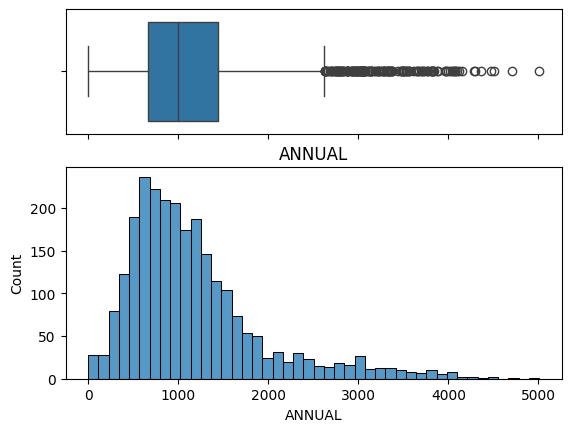

In [ ]:
plot_box_hist(featuers,'ANNUAL')

In [ ]:
X_train['ANNUAL'].clip(lower=lower_limit,upper=upper_limit,inplace=True)
X_test['ANNUAL'].clip(lower=lower_limit,upper=upper_limit,inplace=True)
X_train['ANNUAL'].min(),X_train['ANNUAL'].max()

(-1.0, 3440.697017544413)

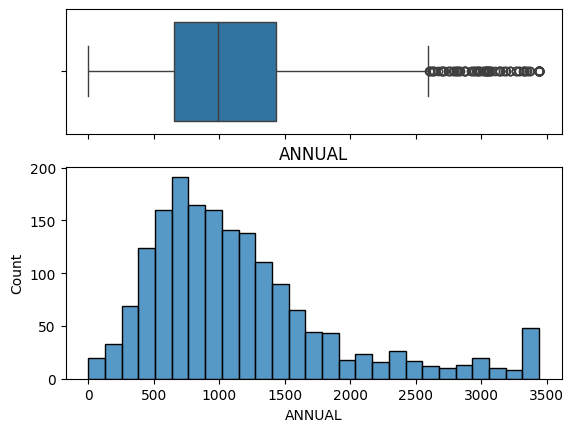

In [ ]:
plot_box_hist(X_train,'ANNUAL')

In [ ]:
def findIQR(df,feature,fold):
  IQR=df[feature].quantile(0.75)-df[feature].quantile(0.25)
  lower_limit=df[feature].quantile(0.25)-(IQR * fold)
  upper_limit=df[feature].quantile(0.75)+(IQR * fold)
  return lower_limit,upper_limit

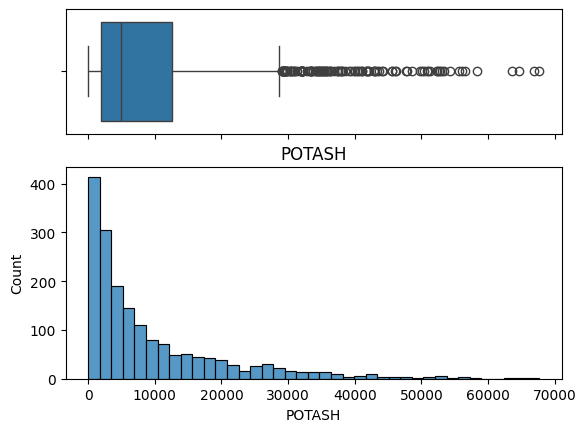

In [ ]:
plot_box_hist(X_train,'POTASH')

In [ ]:
lower_limit,upper_limit=findIQR(X_train,'POTASH',1.5)
lower_limit,upper_limit

(-14216.75, 28709.25)

In [ ]:
X_train['POTASH'].clip(lower=lower_limit,upper=upper_limit,inplace=True)
X_test['POTASH'].clip(lower=lower_limit,upper=upper_limit,inplace=True)

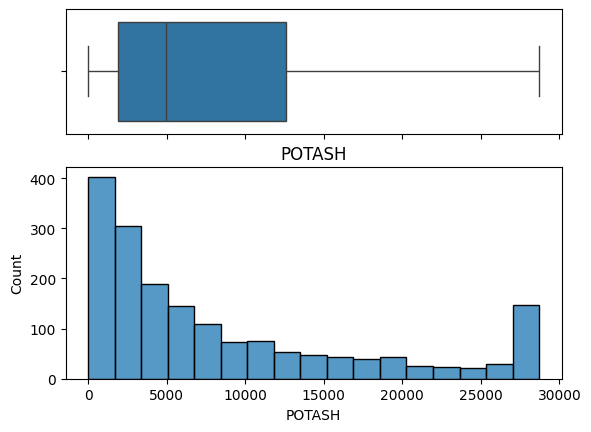

In [ ]:
plot_box_hist(X_train,'POTASH')

In [ ]:
def plotProbplt(data,feature):
  stats.probplot(data[feature],dist='norm',plot=plt)


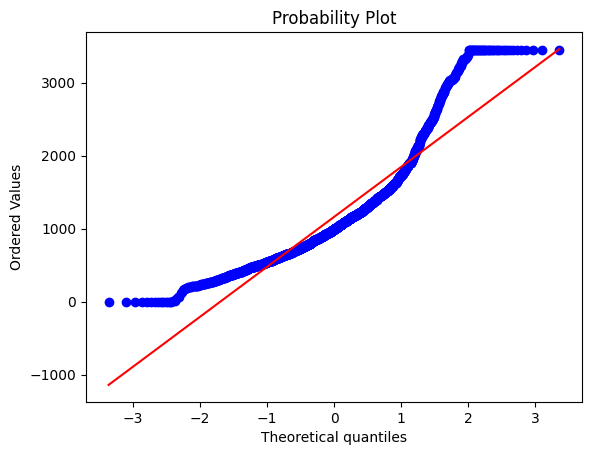

In [ ]:
plotProbplt(X_train,'ANNUAL')

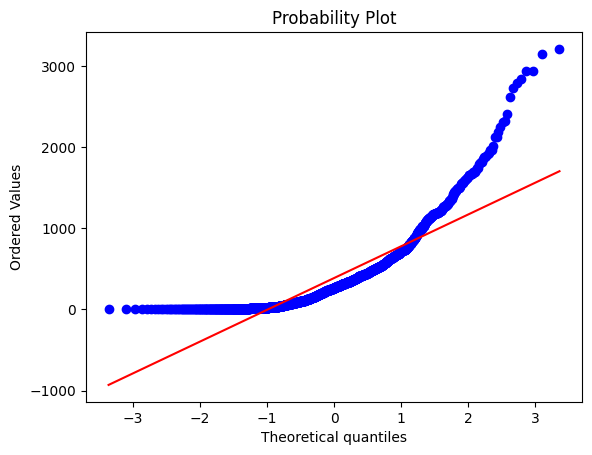

In [ ]:
plotProbplt(X_train,'RICE_PRODUCTION')

In [ ]:
x_scaler=StandardScaler().set_output(transform='pandas')
x_scaler.fit(X_train)
X_train_scaled=x_scaler.transform(X_train)
X_test_scaled=x_scaler.transform(X_test)


In [ ]:
y_scaler=StandardScaler().set_output(transform='pandas')
y_scaler.fit(y_train)
y_train_scaled=y_scaler.transform(y_train)
y_test_scaled=y_scaler.transform(y_test)

In [ ]:
x_scaler.mean_

array([1.16028275e+03, 7.30862864e+01, 5.37720315e+04, 8.54897986e+03,
       2.09757059e+04, 0.00000000e+00, 0.00000000e+00, 3.18619718e-01,
       2.76056338e-02, 0.00000000e+00, 7.41408451e-02, 2.26478873e-02,
       1.19323944e-01, 0.00000000e+00, 2.50704225e-02, 2.60845070e-02,
       8.21971831e-02, 0.00000000e+00, 1.47267606e-01, 3.54929577e-02,
       3.87710118e+02])

In [ ]:
X_train_scaled.describe()

ANNUAL      avg_rain      Nitrogen        POTASH     PHOSPHATE  \
count  1.775000e+03  1.775000e+03  1.775000e+03  1.775000e+03  1.775000e+03   
mean  -1.661269e-16  1.466120e-16  1.501147e-17 -3.502675e-18 -8.506498e-17   
std    1.000282e+00  1.000282e+00  1.000282e+00  1.000282e+00  1.000282e+00   
min   -1.595025e+00 -1.518655e+00 -1.203150e+00 -9.707550e-01 -1.182733e+00   
25%   -6.918097e-01 -6.824875e-01 -7.682690e-01 -7.572202e-01 -7.218066e-01   
50%   -2.336091e-01 -2.370845e-01 -1.790679e-01 -4.071957e-01 -1.935560e-01   
75%    3.764321e-01  3.654794e-01  5.253757e-01  4.613647e-01  4.321576e-01   
max    3.132155e+00  6.057045e+00  6.062508e+00  2.289242e+00  6.080100e+00   

       DYSTROPEPTS  FLUVENTS   INCEPTISOLS  LOAMY_ALFISOL  ORTHENTS  ...  \
count       1775.0    1775.0  1.775000e+03   1.775000e+03    1775.0  ...   
mean           0.0       0.0  2.201682e-17   3.002293e-17       0.0  ...   
std            0.0       0.0  1.000282e+00   1.000282e+00       0.0  ...   
min            0.0       0.0 -7.033923e-01  -2.143802e-01       0.0  ...   
25%            0.0       0.0 -7.033923e-01  -2.143802e-01       0.0  ...   
50%            0.0       0.0 -7.033923e-01  -2.143802e-01       0.0  ...   
75%            0.0       0.0  1.504231e+00  -2.143802e-01       0.0  ...   
max            0.0       0.0  1.504231e+00   7.551432e+00       0.0  ...   

          PSAMMENTS  SANDY_ALFISOL  UDALFS  UDOLLS_UDALFS  UDUPTS_UDALFS  \
count  1.775000e+03   1.775000e+03  1775.0   1.775000e+03   1.775000e+03   
mean   2.401835e-17   5.604281e-17     0.0  -5.604281e-17  -1.801376e-17   
std    1.000282e+00   1.000282e+00     0.0   1.000282e+00   1.000282e+00   
min   -1.613548e-01  -4.009631e-01     0.0  -1.725415e-01  -2.111929e-01   
25%   -1.613548e-01  -4.009631e-01     0.0  -1.725415e-01  -2.111929e-01   
50%   -1.613548e-01  -4.009631e-01     0.0  -1.725415e-01  -2.111929e-01   
75%   -1.613548e-01  -4.009631e-01     0.0  -1.725415e-01  -2.111929e-01   
max    6.963141e+00   2.959327e+00     0.0   6.709734e+00   7.885294e+00   

       USTALF_USTOLLS  USTALFS  VERTIC_SOILS     VERTISOLS  RICE_PRODUCTION  
count    1.775000e+03   1775.0  1.775000e+03  1.775000e+03     1.775000e+03  
mean    -9.006880e-17      0.0  8.456459e-17  2.301758e-17     6.605045e-17  
std      1.000282e+00      0.0  1.000282e+00  1.000282e+00     1.000282e+00  
min     -3.263490e-01      0.0 -4.748178e-01 -2.923131e-01    -8.781361e-01  
25%     -3.263490e-01      0.0 -4.748178e-01 -2.923131e-01    -7.310100e-01  
50%     -3.263490e-01      0.0 -4.748178e-01 -2.923131e-01    -2.751581e-01  
75%     -3.263490e-01      0.0 -4.748178e-01 -2.923131e-01     3.135954e-01  
max      3.643969e+00      0.0  2.749366e+00  6.296331e+00     6.403965e+00  

[8 rows x 21 columns]

In [ ]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [ ]:
linreg.coef_

array([[-2.49225403e-01,  2.83362969e-01,  3.70619492e-01,
        -8.72743546e-02, -6.85634177e-02, -8.32667268e-17,
        -8.41340886e-17, -4.62966025e-02, -1.46797685e-01,
         3.46944695e-18,  3.67418588e-02,  3.45198096e-02,
         3.69140884e-01, -1.11022302e-16, -4.96522396e-02,
         6.43674382e-02, -1.18835532e-01,  0.00000000e+00,
        -7.95587823e-02, -8.41165974e-03,  2.60103905e-01]])

In [ ]:
list(linreg.intercept_)

[-2.863964733218787e-16]

In [ ]:
y_pred_train=linreg.predict(X_train_scaled)

In [ ]:
y_pred_train

array([[ 1.21747885],
       [-1.42877517],
       [-0.39107124],
       ...,
       [ 0.20227766],
       [-0.17367491],
       [-0.07782008]])

In [ ]:
y_train_scaled.to_numpy()

array([[ 2.18299095],
       [-0.85592189],
       [-0.17167067],
       ...,
       [-0.4904453 ],
       [-0.81403721],
       [-0.26633715]])

In [ ]:
residual=y_train_scaled.to_numpy()-y_pred_train
residual

array([[ 0.96551211],
       [ 0.57285328],
       [ 0.21940056],
       ...,
       [-0.69272296],
       [-0.6403623 ],
       [-0.18851707]])

In [ ]:
y_train_scaled.to_numpy().shape,y_pred_train.shape,residual.shape


((1775, 1), (1775, 1), (1775, 1))

In [ ]:
residual_df=pd.DataFrame({'y_train':np.reshape(y_train_scaled.to_numpy(),(1775)),'y_pred':np.reshape(y_pred_train,(1775)),'residual':np.reshape(residual,(1775))})
residual_df

y_train    y_pred  residual
0     2.182991  1.217479  0.965512
1    -0.855922 -1.428775  0.572853
2    -0.171671 -0.391071  0.219401
3    -1.145768 -0.708824 -0.436944
4    -0.508378 -0.150695 -0.357684
...        ...       ...       ...
1770  0.920285  0.218720  0.701565
1771 -1.018839 -0.650375 -0.368464
1772 -0.490445  0.202278 -0.692723
1773 -0.814037 -0.173675 -0.640362
1774 -0.266337 -0.077820 -0.188517

[1775 rows x 3 columns]

In [ ]:
r2=r2_score(y_train_scaled,linreg.predict(X_train_scaled))
print(r2)

0.45424098191223083


In [ ]:
mse=mean_squared_error(y_train_scaled,linreg.predict(X_train_scaled))
mse

0.5457590180877693

In [ ]:
def calculateRMSE(model):
  y_train_pred=model.predict(X_train_scaled)
  rmse_train=round(np.sqrt(mean_squared_error(y_train_scaled,y_train_pred)),3)
  y_test_pred=model.predict(X_test_scaled)
  rmse_test=round(np.sqrt(mean_squared_error(y_test_scaled,y_test_pred)),3)
  print('Train:',rmse_train,'Test:',rmse_test)




In [ ]:
calculateRMSE(linreg)

Train: 0.739 Test: 0.728


In [ ]:
def calculateR2(model):
  y_train_pred=model.predict(X_train_scaled)
  r2_train=round(r2_score(y_train_scaled,y_train_pred),3)

  y_test_pred=model.predict(X_test_scaled)
  r2_test=round(r2_score(y_test_scaled,y_test_pred),3)

  print('R2_train',r2_train,'R2_test',r2_test)


In [ ]:
calculateR2(linreg)

R2_train 0.454 R2_test 0.457


In [ ]:
lasso=Lasso(alpha=0.01,max_iter=100)
lasso.fit(X_train_scaled,y_train_scaled)

Lasso(alpha=0.01, max_iter=100)

In [ ]:
calculateRMSE(lasso)

Train: 0.744 Test: 0.732


In [ ]:
calculateR2(lasso)

R2_train 0.447 R2_test 0.452


In [ ]:
ridge=Ridge(alpha=1,max_iter=500)
ridge.fit(X_train_scaled,y_train_scaled)

Ridge(alpha=1, max_iter=500)

In [ ]:
calculateRMSE(ridge)

Train: 0.739 Test: 0.728


In [ ]:
calculateR2(ridge)

R2_train 0.454 R2_test 0.457


In [ ]:
elastic_net=ElasticNet(alpha=0.01,l1_ratio=0.001,max_iter=500)
elastic_net.fit(X_train_scaled,y_train_scaled)

ElasticNet(alpha=0.01, l1_ratio=0.001, max_iter=500)

In [ ]:
calculateRMSE(elastic_net)

Train: 0.739 Test: 0.728


In [ ]:
calculateR2(elastic_net)

R2_train 0.454 R2_test 0.457


**Feature Selection**
   

> -Finding Constant Featuers



In [ ]:
sel=VarianceThreshold(threshold=0)
sel.fit(X_train_scaled)

VarianceThreshold(threshold=0)

In [ ]:
sum(sel.get_support())

16

In [ ]:
constant_featuers=X_train.columns[~sel.get_support()]
constant_featuers

Index(['DYSTROPEPTS', 'FLUVENTS', 'ORTHENTS', 'UDALFS', 'USTALFS'], dtype='object')

In [ ]:
# Constant featuers in dataset
len(constant_featuers)

5

In [ ]:
for col in constant_featuers:
  print(col,X_train[col].unique())

DYSTROPEPTS [0.]
FLUVENTS [0.]
ORTHENTS [0.]
UDALFS [0.]
USTALFS [0.]


In [ ]:
#Get non constant featuers
feature_names=X_train.columns[sel.get_support()]

In [ ]:
X_train=sel.transform(X_train_scaled)
X_test=sel.transform(X_test_scaled)
X_train.shape,X_test.shape

((1775, 16), (761, 16))

In [ ]:
X_train=pd.DataFrame(X_train,columns=feature_names)
X_test=pd.DataFrame(X_test,columns=feature_names)

**Feature Correlation**
> Its good to have correlation between featuers and target variable but Not good to have correlation between featuers themself



<Axes: >

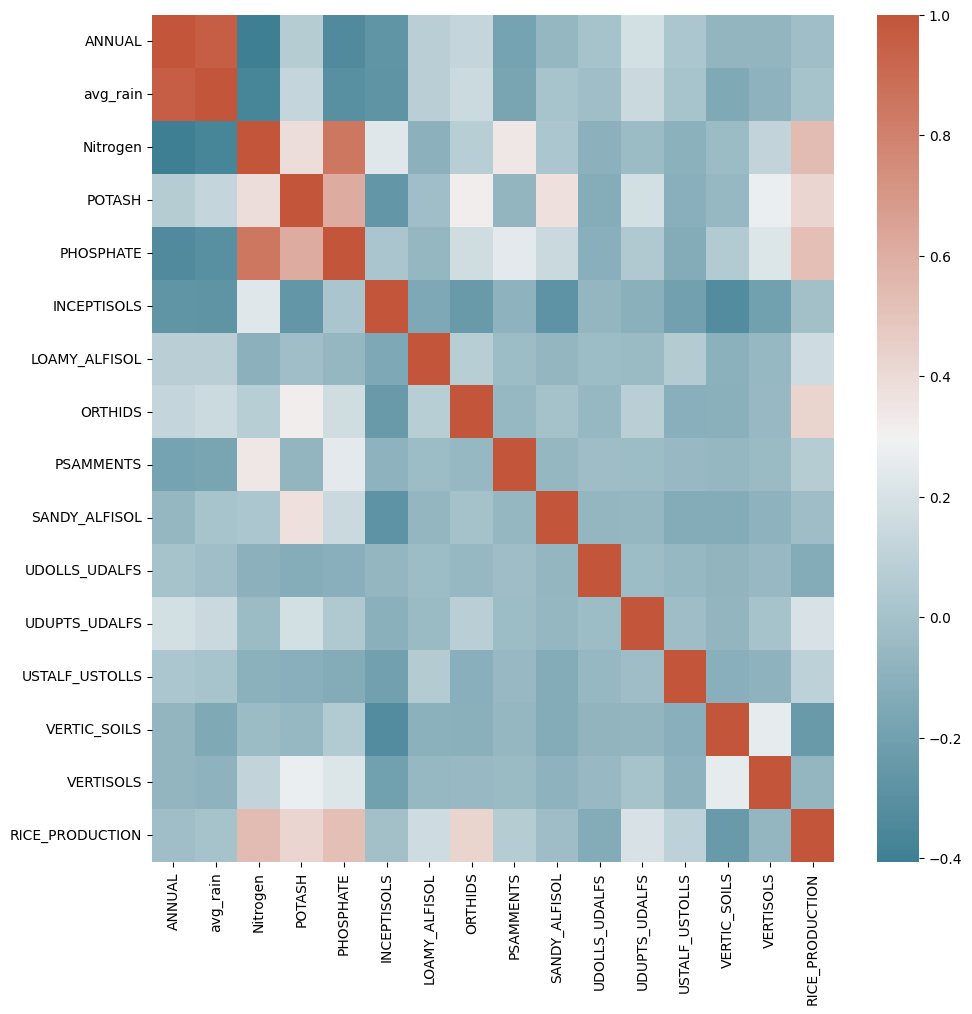

In [ ]:
#Correlation Heatmap
corrmat=X_train.corr(method='pearson')

cmap=sns.diverging_palette(220,20,as_cmap=True)

fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,cmap=cmap)

In [ ]:
c=0
for i in corrmat.loc['Nitrogen']:
  if i > 0.8:
    print(corrmat.columns[c],i)
  c=c+1

Nitrogen 1.0
PHOSPHATE 0.8516099093837481


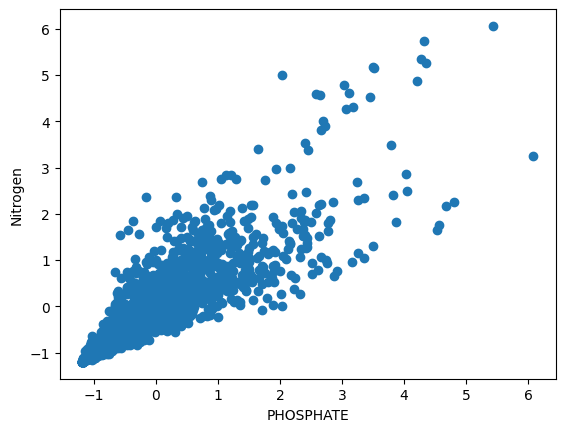

In [ ]:
plt.scatter(X_train['PHOSPHATE'],X_train['Nitrogen'])
plt.xlabel('PHOSPHATE')
plt.ylabel('Nitrogen')
plt.show()

In [ ]:
c=0
for i in corrmat.loc['RICE_PRODUCTION']:
  if i<-0.8:
    print(corrmat.columns[c],i)
  c=c+1

**Remove Corretated Featuers**

> Brute Force Method


In [ ]:
def correlation(dataset,threshold):
  col_corr=set()

  corr_mat=dataset.corr()

  for i in range(len(corr_mat.columns)):
    for j in range(i):
      if abs(corr_mat.iloc[i,j])>threshold:
        print(abs(corr_mat.iloc[i,j]),corr_mat.columns[i],corr_mat.columns[j])
        colname=corr_mat.columns[j]
        col_corr.add(colname)
  return col_corr


In [ ]:
corr_featuers=correlation(X_train,0.8)
corr_featuers

0.95866889727958 avg_rain ANNUAL
0.8516099093837481 PHOSPHATE Nitrogen


{'ANNUAL', 'Nitrogen'}

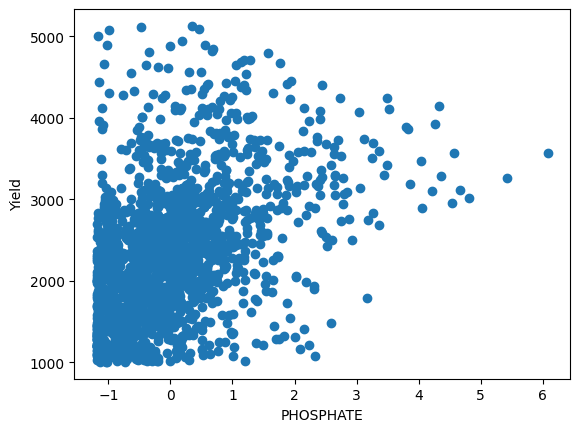

In [ ]:
plt.scatter(X_train['PHOSPHATE'],y_train)
plt.xlabel('PHOSPHATE')
plt.ylabel('Yield')
plt.show()


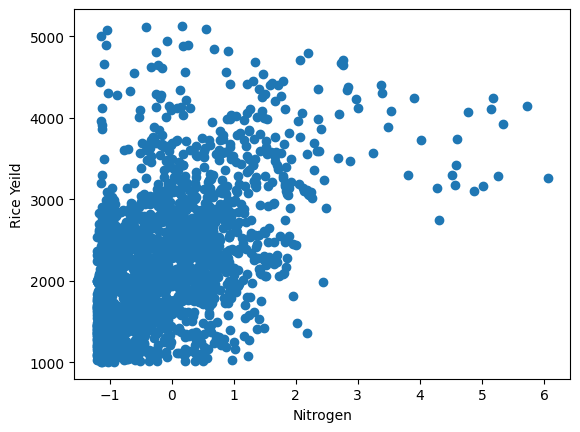

In [ ]:
plt.scatter(X_train['Nitrogen'],y_train)
plt.xlabel('Nitrogen')
plt.ylabel('Rice Yeild')
plt.show()

**Using machine learning model**

> identify groups of highly correlated features. And then, we can make further investigation



In [ ]:
corrmat=X_train.corr()
corrmat=corrmat.abs().unstack()
corrmat=corrmat.sort_values(ascending=False)
corrmat=corrmat[corrmat>=0.8]
corrmat=corrmat[corrmat<1]
corrmat=pd.DataFrame(corrmat).reset_index()
corrmat.columns=['Feature1','Feature2','Corr']
corrmat.head()

Feature1   Feature2      Corr
0   avg_rain     ANNUAL  0.958669
1     ANNUAL   avg_rain  0.958669
2  PHOSPHATE   Nitrogen  0.851610
3   Nitrogen  PHOSPHATE  0.851610

In [ ]:
X_train.shape,X_test.shape

((1775, 16), (761, 16))

In [ ]:
list(corr_featuers)

['Nitrogen', 'ANNUAL']

In [ ]:
X_train.drop(labels=list(corr_featuers),axis=1,inplace=True)
X_test.drop(labels=list(corr_featuers),axis=1,inplace=True)
X_train.shape,X_test.shape

((1775, 14), (761, 14))

Mutual Information for Regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Mutual Information')

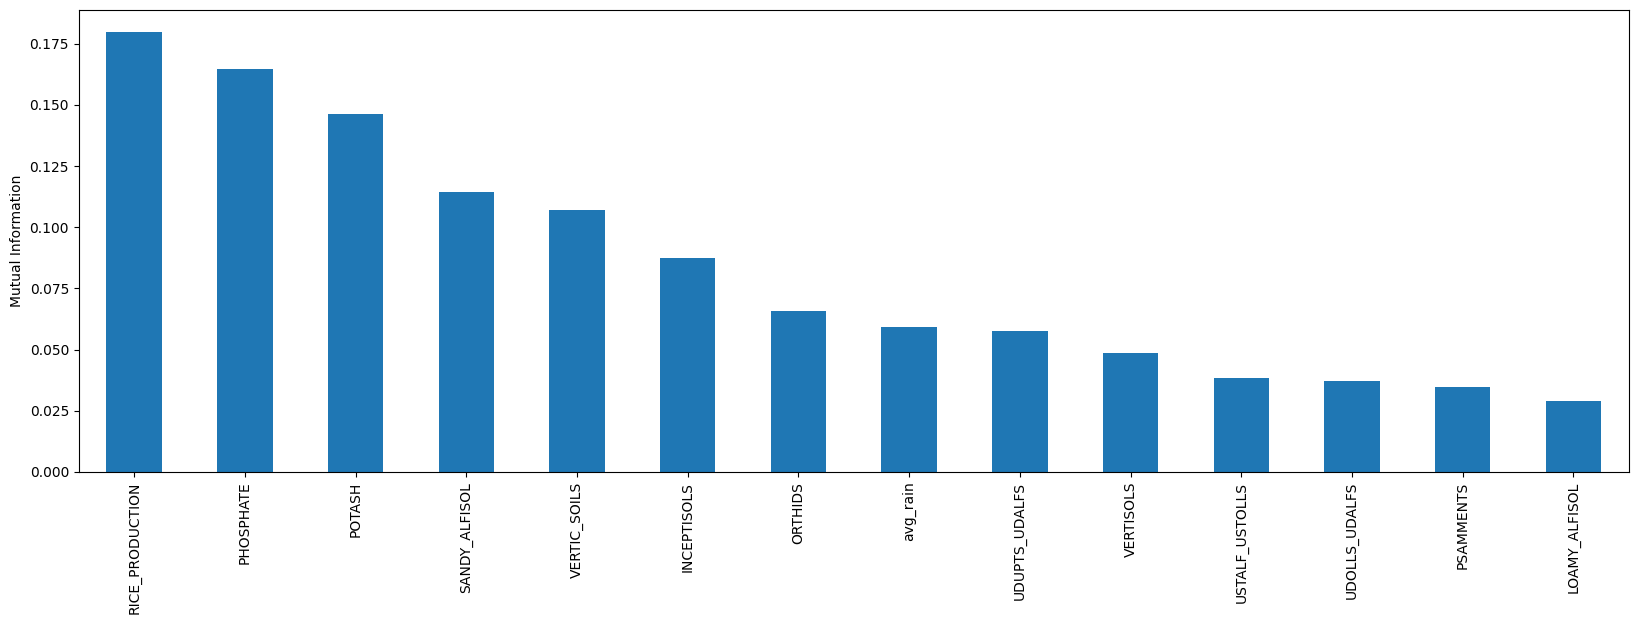

In [ ]:
mi=mutual_info_regression(X_train,y_train)
mi=pd.Series(mi)
mi.index=X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

In [ ]:
sel=SelectPercentile(mutual_info_regression,percentile=10).fit(X_train,y_train)
selected_featuers=X_train.columns[sel.get_support()]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
selected_featuers

Index(['PHOSPHATE', 'RICE_PRODUCTION'], dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

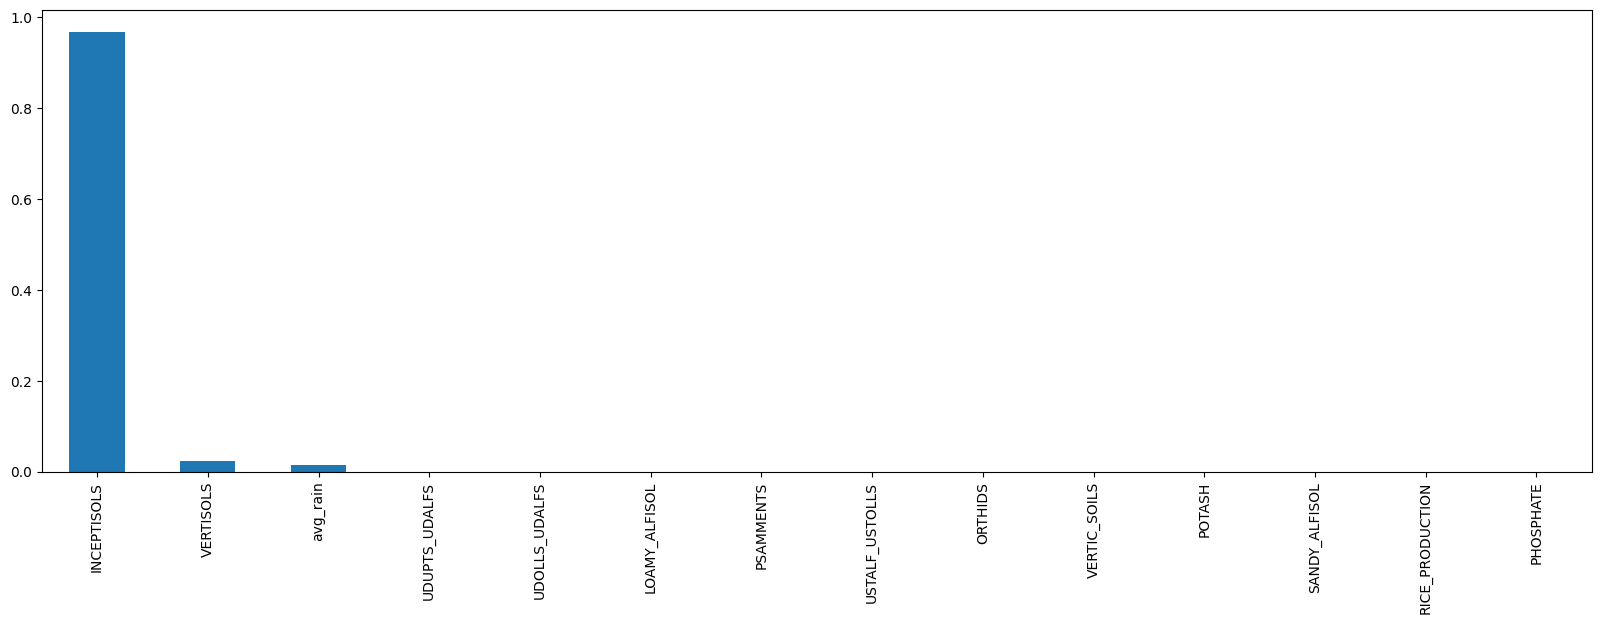

In [ ]:
univariate=f_regression(X_train,y_train)
univariate=pd.Series(univariate[1])
univariate.index=X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

**Step Forward Feature Selection**

---



In [ ]:
sfs=SFS(
    estimator=Lasso(alpha=0.1),
    n_features_to_select=12,
    tol=None,
    direction='forward',
    scoring='r2',
    cv=2,

)
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=2, estimator=Lasso(alpha=0.1),
                          n_features_to_select=12, scoring='r2')

In [ ]:
sfs.get_feature_names_out()

array(['avg_rain', 'POTASH', 'PHOSPHATE', 'LOAMY_ALFISOL', 'ORTHIDS',
       'PSAMMENTS', 'SANDY_ALFISOL', 'UDOLLS_UDALFS', 'UDUPTS_UDALFS',
       'USTALF_USTOLLS', 'VERTIC_SOILS', 'RICE_PRODUCTION'], dtype=object)

In [ ]:
def compareFeature(X_train,X_test,y_train,y_test):
  lasso=Lasso(alpha=0.1)
  lasso.fit(X_train,y_train)

  print('Train set')
  pred=lasso.predict(X_train)
  print('R2 Score',r2_score(y_train,pred))

  print('Test set')
  pred=lasso.predict(X_test)
  print('R2 score',r2_score(y_test,pred))

In [ ]:
selected_feature=sfs.get_feature_names_out()

In [ ]:
compareFeature(X_train[selected_featuers],X_test[selected_featuers],y_train,y_test)

Train set
R2 Score 0.22324044045003455
Test set
R2 score 0.24038882039381237


In [ ]:
compareFeature(X_train,X_test,y_train,y_test)

Train set
R2 Score 0.4245505344987446
Test set
R2 score 0.42400348979622704


In [ ]:
sbs=SFS(
    Lasso(alpha=0.1),
    n_features_to_select=10,
    direction='backward',
    scoring='r2'

)
sbs=sbs.fit(X_train,y_train)

In [ ]:
selected_featuers=sbs.get_feature_names_out()
selected_featuers

array(['POTASH', 'PHOSPHATE', 'LOAMY_ALFISOL', 'PSAMMENTS',
       'SANDY_ALFISOL', 'UDOLLS_UDALFS', 'UDUPTS_UDALFS',
       'USTALF_USTOLLS', 'VERTIC_SOILS', 'RICE_PRODUCTION'], dtype=object)

In [ ]:
compareFeature(X_train[selected_featuers],X_test[selected_featuers],y_train,y_test)

Train set
R2 Score 0.42371936789398357
Test set
R2 score 0.4224189643592263


In [ ]:
compareFeature(X_train,X_test,y_train,y_test)

Train set
R2 Score 0.4245505344987446
Test set
R2 score 0.42400348979622704


In [ ]:
sel=SelectFromModel(LinearRegression())
sel.fit(X_train,y_train)

SelectFromModel(estimator=LinearRegression())

In [ ]:
selected_featuers=sel.get_feature_names_out()

In [ ]:
selected_featuers

array(['PHOSPHATE', 'LOAMY_ALFISOL', 'SANDY_ALFISOL', 'USTALF_USTOLLS',
       'RICE_PRODUCTION'], dtype=object)

In [ ]:
sel=SelectFromModel(Lasso(alpha=10,random_state=0))
sel.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=10, random_state=0))

In [ ]:
selected_featuers=sel.get_feature_names_out()
selected_featuers

array(['POTASH', 'PHOSPHATE', 'INCEPTISOLS', 'LOAMY_ALFISOL', 'PSAMMENTS',
       'SANDY_ALFISOL', 'UDOLLS_UDALFS', 'UDUPTS_UDALFS',
       'USTALF_USTOLLS', 'VERTIC_SOILS', 'VERTISOLS', 'RICE_PRODUCTION'],
      dtype=object)

In [ ]:
selected_featuers=X_train.columns[sel.get_support()]
selected_featuers

Index(['POTASH', 'PHOSPHATE', 'INCEPTISOLS', 'LOAMY_ALFISOL', 'PSAMMENTS',
       'SANDY_ALFISOL', 'UDOLLS_UDALFS', 'UDUPTS_UDALFS', 'USTALF_USTOLLS',
       'VERTIC_SOILS', 'VERTISOLS', 'RICE_PRODUCTION'],
      dtype='object')

In [ ]:
print('Featuers length after Featuer selection:{}'.format(len(selected_featuers)))

Featuers length after Featuer selection:12


In [ ]:
print('Original Feature Length:{}'.format(len(featuers.columns)))

Original Feature Length:21


**HyperParameter Optimization**

> Cross Validation



In [ ]:
lasso=Lasso(alpha=10,random_state=0)

In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=1)


In [ ]:
clf=cross_validate(
    lasso,
    X_train[selected_featuers],
    y_train,
    scoring='r2',
    return_train_score=True,
    cv=kf
)

In [ ]:
clf['test_score']

array([0.3608054 , 0.40273769, 0.48882124, 0.38078482, 0.39870624])

In [ ]:
print('mean train set accuracy:{} +- {}'.format(np.mean(clf['train_score']),np.std(clf['train_score'])))
print('mean train set accuracy:{} +- {}'.format(np.mean(clf['test_score']),np.std(clf['test_score'])))

mean train set accuracy:0.42241089282472755 +- 0.009866281836399805
mean train set accuracy:0.40637107724051613 +- 0.043819784659744586




> Repeated K-Fold



In [ ]:
lasso = Lasso(alpha=10,random_state=0)
rkf=RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=4
)

clf=cross_validate(
    lasso,
    X_train[selected_featuers],
    y_train,
    scoring='r2',
    return_train_score=True,
    cv=rkf

)


In [ ]:
clf['test_score']

array([0.45304552, 0.42782129, 0.34602577, 0.37123742, 0.45637924,
       0.41548351, 0.41355933, 0.45360351, 0.43641891, 0.3508994 ,
       0.35530021, 0.39940529, 0.38300349, 0.4656729 , 0.42481965,
       0.48771648, 0.46020421, 0.35491951, 0.37211213, 0.37352767,
       0.41707042, 0.44674661, 0.37158261, 0.34540361, 0.46753374,
       0.38853855, 0.4566803 , 0.38475162, 0.44155124, 0.38542932,
       0.40058782, 0.36036745, 0.46559772, 0.36729224, 0.47142566,
       0.41301659, 0.4551966 , 0.38306413, 0.41190466, 0.41541759,
       0.42157433, 0.47384226, 0.34794984, 0.33609033, 0.4645623 ,
       0.42355828, 0.36433973, 0.35492298, 0.41621288, 0.50082241])

In [ ]:
print('Mean traing set accuracy',np.mean(clf['train_score']),'+/-',np.std(clf['train_score']))
print('Mean test set accuracy',np.mean(clf['test_score']),'+/-',np.std(clf['test_score']))

Mean traing set accuracy 0.4222873112824018 +/- 0.010953518727734018
Mean test set accuracy 0.4110837850082796 +/- 0.044018189480473785


**Cross Validation with Grid Search**

In [ ]:
lasso=Lasso(alpha=0.1)
param_grid=dict(
    alpha=[1,10,100]
)
kf=KFold(n_splits=5,shuffle=True,random_state=1)

clf=GridSearchCV(
    lasso,
    param_grid,
    scoring='r2',
    cv=kf,
    refit=True
)
search=clf.fit(X_train[selected_featuers],y_train)

In [ ]:
search.best_params_

{'alpha': 1}

In [ ]:
search.best_score_

0.4081039841089356

In [ ]:
result=pd.DataFrame(search.cv_results_)
result

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009976      0.003638         0.002311        0.000270           1   
1       0.007218      0.002112         0.001990        0.000026          10   
2       0.006965      0.001947         0.002002        0.000066         100   

           params  split0_test_score  split1_test_score  split2_test_score  \
0    {'alpha': 1}           0.364272           0.403583           0.486638   
1   {'alpha': 10}           0.360805           0.402738           0.488821   
2  {'alpha': 100}           0.310557           0.315623           0.380288   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.378760           0.407267         0.408104        0.042358   
1           0.380785           0.398706         0.406371        0.043820   
2           0.306812           0.313188         0.325294        0.027652   

   rank_test_score  
0                1  
1                2  
2                3

In [ ]:
lasso=Lasso(alpha=0.1)
rkf=RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=1

)
param_grid=dict(alpha=[1,10,100])
gcv=GridSearchCV(
    lasso,
    param_grid,
    scoring='r2',
    cv=rkf,
    refit=True

)
search=gcv.fit(X_train[selected_featuers],y_train)



In [ ]:
search.best_params_

{'alpha': 1}